In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from PIL import Image

In [4]:
MODULE_HANDLE = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'
module = hub.load(MODULE_HANDLE)

#Download Image Labels#

In [12]:
!wget -O labels.txt --quiet https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt

with open('labels.txt', 'r') as f:
    labels = [l.strip() for l in f.readlines()]

# get number of labels
num_classes = len(labels)

print('There are a total of {0} labels representing {0} classes.\n'.format(num_classes))

There are a total of 1001 labels representing 1001 classes.



#Using module directly#

golden retriever was predicted with a score of 0.41048893332481384
standard poodle was predicted with a score of 0.14699535071849823
cocker spaniel was predicted with a score of 0.09533227980136871
Afghan hound was predicted with a score of 0.05190608277916908
clumber was predicted with a score of 0.024634279310703278


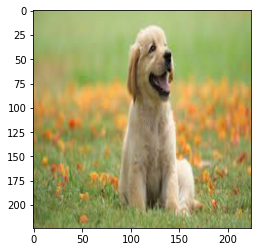

In [14]:
img = Image.open('dog.jpg')
img = img.resize((224,224))
img = np.array(img)/255.
plt.imshow(img)
#As the final layer of the module does not have activations, you must pass it through a softmax activation at the end
predictions = tf.nn.softmax(module([img]))[0]
#Take the 5 highest predicted values
top_vals, top_idxs = tf.math.top_k(predictions, k=5)

top_vals = top_vals.numpy()
top_idxs = top_idxs.numpy()

for value, idx in zip(top_vals,top_idxs):
  print(f'{labels[idx]} was predicted with a score of {value}')

#Using tf keras model#

In [16]:
model = tf.keras.Sequential([
                             hub.KerasLayer(MODULE_HANDLE, input_shape=(224,224,3,)),
                             tf.keras.layers.Activation('softmax')
])

golden retriever predicted with score of 0.41048893332481384
standard poodle predicted with score of 0.14699535071849823
cocker spaniel predicted with score of 0.09533227980136871


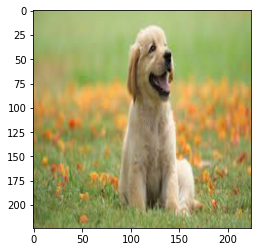

In [24]:
img = Image.open('dog.jpg')
img = img.resize((224,224))
img = np.array(img)/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)
preds = model.predict(img)[0]
top_vals, top_idxs = tf.math.top_k(preds, k=3)

top_vals = top_vals.numpy()
top_idxs = top_idxs.numpy()

for val, idx in zip(top_vals, top_idxs):
  print(f'{labels[idx]} predicted with score of {val}')

#Transfer Learning#
In order to do Transfer Learning, you need the `feature_vector` from tensorflow hub

In [2]:
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [4]:
# Number of classes in the new dataset
NUM_CLASSES = 20

#Can create your custom classification layer (The last layer). The previous layers
model = tf.keras.Sequential([
        hub.KerasLayer(MODULE_HANDLE,
                       input_shape=(224,224,3,)),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])